## Project - Learning Loss during Covid
- In this project we will be taking a look at learning loss during COVID-19 between March 2020 and March 2022. The dataset that we will be looking at includes 41 countries with many variables. The dataset can be found [here](https://microdata.worldbank.org/index.php/catalog/5367/study-description)

For this project, we want to focus on these goals:
1. What is the correlation between school closures and learning loss?
2. Since many people were at home mostly, is it safe to say that the significant use of internet is somehow related to learning loss?
3. What can we say about private schools and learning loss? Do private schools contribute to learning loss or are they just irrelvant to learning loss?
4. What can we say about countries with small and big populations when it comes to learning loss? 
5. Do the number of deaths affect how much learning has been lost?
6. What is the most common learning loss value and can we analyze the column more?
7. What can we say about high income countries and low income countries as it pertains to learning loss and some other variables?
8. Are there some instances where schools being closed for some time did not have any impact on learning loss?

In [1]:
# Importing the numpy package:
import numpy as np

In [2]:
# Importing the pandas package:
import pandas as pd

In [3]:
# Using the pandas.read_csv method to read the file into a DataFrame:
df = pd.read_csv("C:/Users/salem/Downloads/learning_loss_covid_database.csv")

In [4]:
# Printing the first couple of rows of the DataFrame:
df.head()

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,...,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
0,Argentina,0.44,39,288.00,8585.69,26.08010,86,457.418,65.0681,67.0396,...,1521,45000000,9.51,ARG,Latin America and the Caribbean,18.2967,0,413.418,0,16.5367
1,Australia,0.01,8,60.37,51680.30,29.53870,90,544.360,64.0000,61.0000,...,64,26000000,11.54,AUS,Advanced Economies,21.7744,1,543.360,1,21.7344
2,Bangladesh,0.28,63,17.84,2270.35,23.90350,25,340.088,17.0000,70.0000,...,3969,170000000,5.91,BGD,South Asia,13.6035,0,312.088,0,12.4835
3,Belgium,0.23,9,284.67,45189.40,54.17840,92,340.088,87.0000,50.0000,...,81,11000000,10.69,BEL,Advanced Economies,13.6035,1,317.088,1,12.6835
4,Botswana,0.29,11,118.60,6348.83,6.93809,64,417.656,12.0000,50.0000,...,121,2300000,9.55,BWA,Sub-Saharan Africa,16.7062,0,388.656,0,15.5462


In [5]:
# Printing the last couple of rows of the DataFrame:
df.tail()

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,...,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
36,Sweden,0.00,0,200.75,52300.200,10.98090,95,555.160,79.00000,46.0000,...,0,10000000,11.64,SWE,Advanced Economies,22.2064,1,555.160,1,22.2064
37,Switzerland,0.20,8,161.96,87100.400,5.49697,94,555.160,75.00000,49.0000,...,64,8600000,13.02,CHE,Advanced Economies,22.2064,1,535.160,1,21.4064
38,Turkey,0.37,40,119.97,3597.220,4.97713,57,483.399,72.00000,57.0000,...,1600,83000000,7.05,TUR,Advanced Economies,19.3360,1,446.399,0,17.8559
39,Uganda,0.14,39,8.00,822.028,20.00000,20,359.673,1.90467,62.3167,...,1521,44000000,5.70,UGA,Sub-Saharan Africa,14.3869,0,345.673,0,13.8269
40,United States,0.22,8,322.51,15418.800,17.06250,73,469.567,89.00000,57.0000,...,64,330000000,13.18,USA,Advanced Economies,18.7827,1,447.567,1,17.9027


In [6]:
# Checking some basic information about the DataFrame by using the frame.info() method:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

In [7]:
# Printing out all of the unique values for the oecd variable:
oecd_values = df["oecd"].unique()

In [8]:
oecd_values

array([0, 1], dtype=int64)

In [9]:
# Printing out all of the unique values for the high variable:
high_values = df["high"].unique()

In [10]:
high_values

array([0, 1], dtype=int64)

In [11]:
# Converting the high variable to a boolean type variable:
df["high"] = df["high"].astype("boolean")

In [12]:
# Converting the oecd variable to a boolean type variable:
df["oecd"] = df["oecd"].astype("boolean")

In [13]:
# Double-checking to make sure that the datatypes for the high and oecd variables changed to boolean type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

In [14]:
# Using the isna method to see which values are null:
df.isna()

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,...,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Using the shape method to print out how many rows and columns there are:
df.shape

(41, 24)

In [16]:
# Dropping the missing values with the dropna method:
df_2 = df.dropna()

In [17]:
# Using the shape method again to print out the number of rows and columns after dropping the missing values:
df_2.shape

(39, 24)

- Since there are only two columns that have missing values, it may be a good idea to keep them because we may miss out on important information.

# Correlation between the weeks and loss variables

In [18]:
# Selecting the country, weeks, and loss columns to answer out first question:
first_question = df[["weeks", "loss"]]

In [19]:
# Printing out the DataFrame for the first question:
first_question

,weeks,loss
0,39,0.44
1,8,0.01
2,63,0.28
3,9,0.23
4,11,0.29
5,38,0.32
6,40,0.45
7,26,0.17
8,14,0.25
9,7,0.22


In [20]:
# Importing the seaborn library:
import seaborn as sns

In [21]:
# Using the corr method to compute the correlation between the weeks variable and the loss variable:
first_question["loss"].corr(first_question["weeks"])

0.6439600885466991

Based off this value, it is safe to say that there is a strong positive correlation between the weeks variable and the loss variable. The longer schools are closed, the more the loss value go up. However, we can also confirm this by making a scatter plot along with a linear regression line

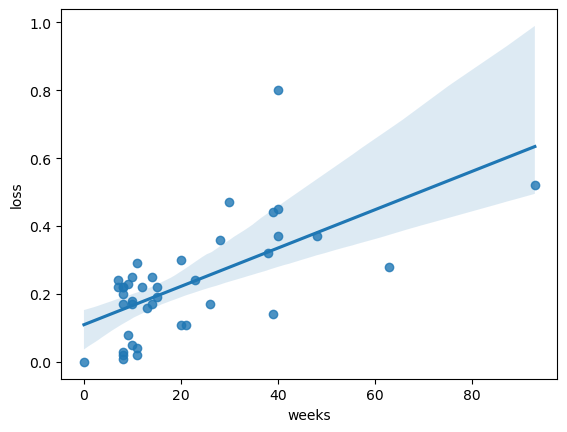

In [22]:
# Using seaborn's regplot method, which makes a scatter plot and fits a linear regression for the correlation
# between the loss and weeks variable:
ax = sns.regplot(x="weeks", y="loss", data = first_question)

As we can see from the scatter plot clearly there is a positive correlation between the two variables. However, we can see that there are a couple of outliers. We should try to get rid of them.

In [23]:
# Using the describe() method to get some statistics of the short DataFrame:
first_question.describe()

,weeks,loss
count,41.000000,41.000000
mean,20.780488,0.226829
std,18.206472,0.159459
min,0.000000,0.000000
25%,9.000000,0.140000
50%,13.000000,0.220000
75%,28.000000,0.290000
max,93.000000,0.800000


In [24]:
# Finding values that do not exceed the maximum of the weeks column:
first_question_2 = first_question[first_question['weeks'] < 93]

In [25]:
first_question_2

,weeks,loss
0,39,0.44
1,8,0.01
2,63,0.28
3,9,0.23
4,11,0.29
5,38,0.32
6,40,0.45
7,26,0.17
8,14,0.25
9,7,0.22


In [26]:
# Finding values that do not exceed the maximum of the loss column:
first_question_2 = first_question_2[first_question_2['loss'] < 0.8]

In [27]:
first_question_2

,weeks,loss
0,39,0.44
1,8,0.01
2,63,0.28
3,9,0.23
4,11,0.29
5,38,0.32
6,40,0.45
7,26,0.17
8,14,0.25
9,7,0.22


In [28]:
# Using the describe() method again to see if there are any changes after getting rid of the outliers:
first_question_2.describe()

,weeks,loss
count,39.000000,39.000000
mean,18.435897,0.204615
std,14.010888,0.123902
min,0.000000,0.000000
25%,8.500000,0.125000
50%,12.000000,0.220000
75%,24.500000,0.265000
max,63.000000,0.470000


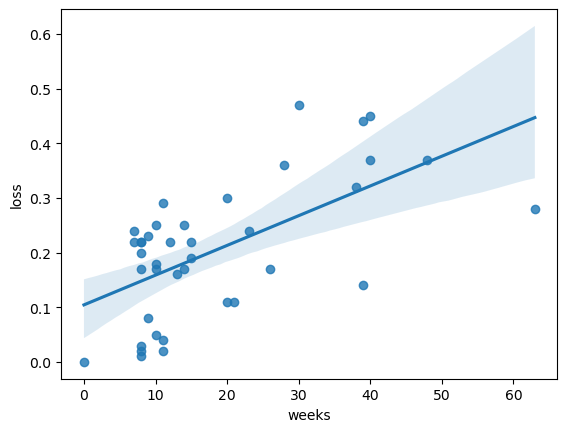

In [29]:
# Using seaborn's regplot method, which makes a scatter plot and fits a linear regression for the correlation
# between the loss and weeks variable after getting rid of the outliers:
ax = sns.regplot(x="weeks", y="loss", data = first_question_2)

- As we can see there are still some outliers, it may be a better idea to lower the limit for both of the columns.

In [30]:
first_question_3 = first_question[first_question['weeks'] < 40]

In [31]:
first_question_3

,weeks,loss
0,39,0.44
1,8,0.01
3,9,0.23
4,11,0.29
5,38,0.32
7,26,0.17
8,14,0.25
9,7,0.22
10,23,0.24
11,9,0.08


In [32]:
first_question_3 = first_question_3[first_question_3['loss'] < 0.4]

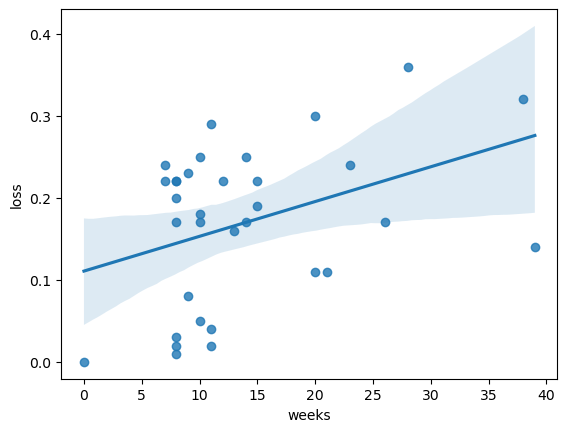

In [33]:
ax = sns.regplot(x="weeks", y="loss", data = first_question_3)

- Like the previous scatter plots, there are still a lot of outliers.

In [34]:
first_question_4 = first_question[first_question['weeks'] < 42]

In [35]:
first_question_4 = first_question_4[first_question_4['loss'] < 0.5]

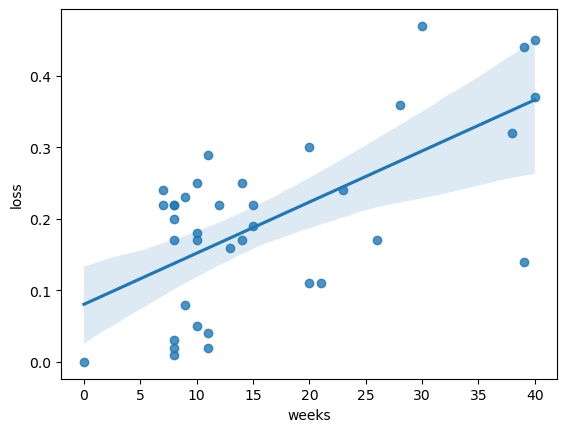

In [36]:
ax = sns.regplot(x="weeks", y="loss", data = first_question_4)

- It seems that we got more outliers in this scatter plot as well.

In [37]:
first_question_5 = first_question[first_question['weeks'] < 40]

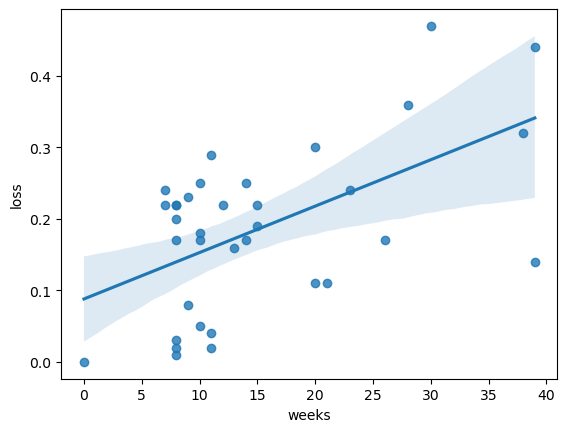

In [38]:
ax = sns.regplot(x="weeks", y="loss", data = first_question_5)

In [39]:
# Checking the correlations after getting rid of some outliers
first_question_5["loss"].corr(first_question_5["weeks"])

0.5535696538630549

- After filtering on only the weeks column, we still get a lot more outliers and the correlation between the two variables decrease

In [40]:
first_question_6 = first_question[first_question['loss'] < 0.37]

In [41]:
first_question_6 = first_question_6[first_question_6['weeks'] < 35]

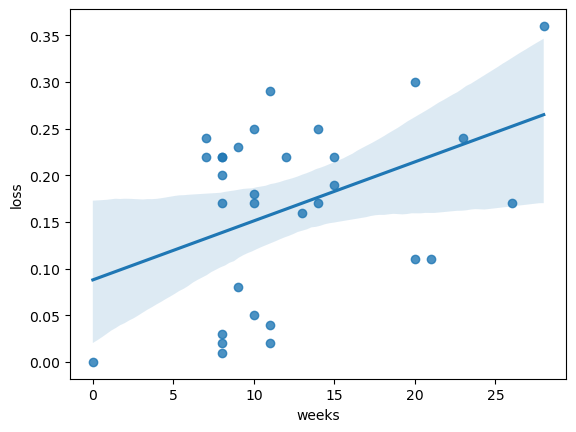

In [42]:
ax = sns.regplot(x="weeks", y="loss", data = first_question_6)

In [43]:
first_question_6["loss"].corr(first_question_6["weeks"])

0.41025021651903865

- Once again the correlation is even lower.

In [44]:
first_question_7 = first_question[first_question['loss'] < 0.47]

In [45]:
first_question_7 = first_question_7[first_question_7['weeks'] < 20]

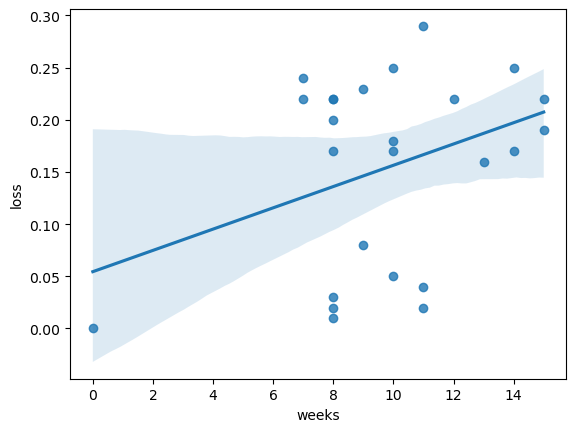

In [46]:
ax = sns.regplot(x="weeks", y="loss", data = first_question_7)

In [47]:
first_question_7["loss"].corr(first_question_7["weeks"])

0.35501209985033116

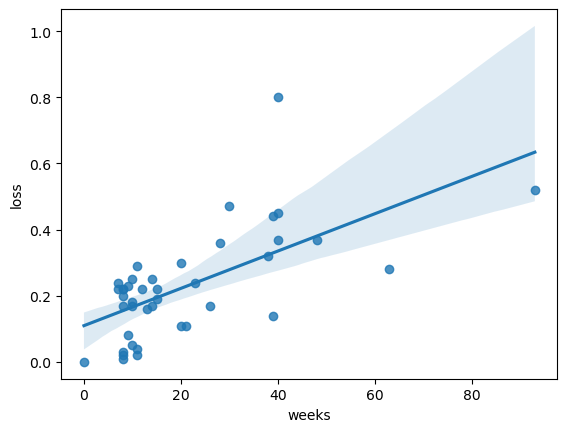

In [48]:
ax = sns.regplot(x="weeks", y="loss", data = first_question)

In [49]:
first_question_8 = first_question[first_question['weeks'] < 42]

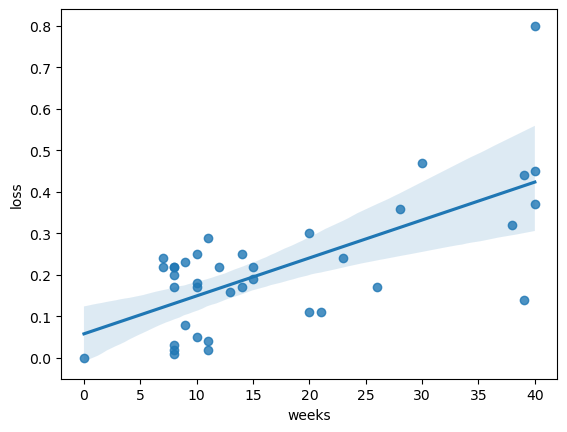

In [50]:
ax = sns.regplot(x="weeks", y="loss", data = first_question_8)

In [51]:
first_question_8["loss"].corr(first_question_8["weeks"])

0.6803747561125147

- After a couple of attempts, some outliers have been eliminated and when checking the correlation by using the ```corr``` method between the two columns, we can see that the correlation went up by a little bit. It is still in a positive direction.

# Correlation between internet use and learning loss

-To find out if there is a correlation between internet use and learning use, we have to first select the relevant columns to answer this question. Just by looking at our dataset, we can confirm these columns would be relevant:
1. ```internet```
2. ```loss```   

In [52]:
# Selecting the columns relevant for our second question which are the internet and loss columns:
second_question = df[["internet", "loss"]]

In [53]:
second_question

,internet,loss
0,86,0.44
1,90,0.01
2,25,0.28
3,92,0.23
4,64,0.29
5,81,0.32
6,33,0.45
7,97,0.17
8,88,0.25
9,70,0.22


In [54]:
# Using the corr method to compute the correlation between the internet and loss columns:
df['internet'].corr(second_question['loss'])

-0.4376653811632094

As we can see we have a negative correlation. The sign implies direction. It is not very strong however. If it were strong then we can say without a doubt that the lower the internet penetration rate or the percentage of individuals using the internet, the higher the learning loss will be. We could also say the higher the learning loss, the lower the internet penetration rate. We can get a better idea of this by making a scatter plot in the cell below.

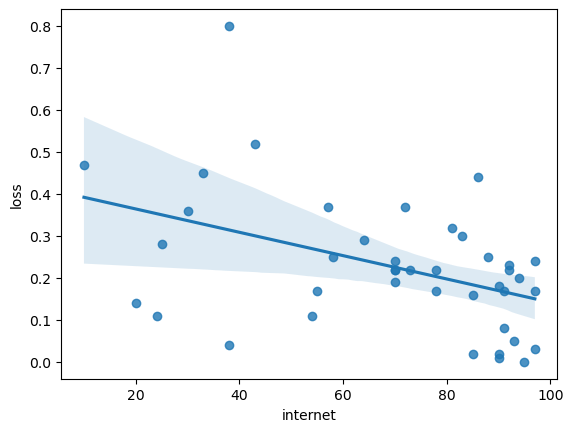

In [55]:
# Using seaborn's regplot method to make a scatter plot and fit a regression line between
# the internet and loss columns:
ax = sns.regplot(x="internet", y="loss", data=second_question)

As we can see from the above scatter plot, there are a lot of outliers. We can try to get rid of some outliers and see if that will make the negative correlation stronger.

In [56]:
# Using the decribe method to print out the aggregates of the dataset:
second_question.describe()

,internet,loss
count,41.000000,41.000000
mean,69.439024,0.226829
std,25.115781,0.159459
min,10.000000,0.000000
25%,55.000000,0.140000
50%,78.000000,0.220000
75%,90.000000,0.290000
max,97.000000,0.800000


In [57]:
# Filtering the internet column:
second_question_2 = second_question[second_question['internet'] > 25]

In [58]:
# Recalculating the correlation between the internet and loss columns after filtering the internet column:
second_question_2['internet'].corr(second_question_2['loss'])

-0.5429184441659674

After filtering the internet column, we recalculated the correlation and see that it went up. Let us plot this on a scatter plot in the cell below.

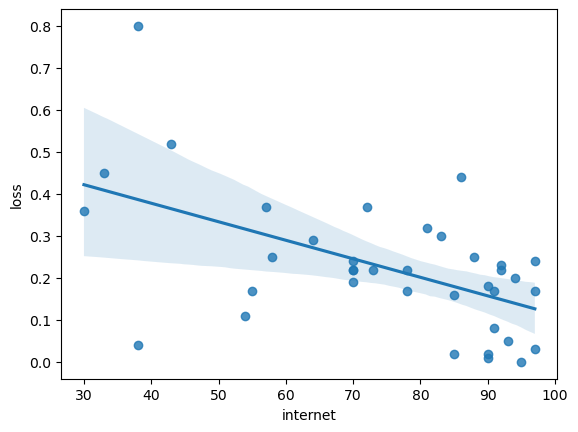

In [59]:
ax = sns.regplot(x="internet", y="loss", data=second_question_2)

It does not look too bad. Let us see if we can get rid of some more outliers.

In [60]:
second_question_3 = second_question_2[second_question_2['loss'] > 0.1]

In [61]:
second_question_3['internet'].corr(second_question_3['loss'])

-0.5544460313351167

Progress is being made. Let us make another scatter plot in the cell below to analyze the outliers.

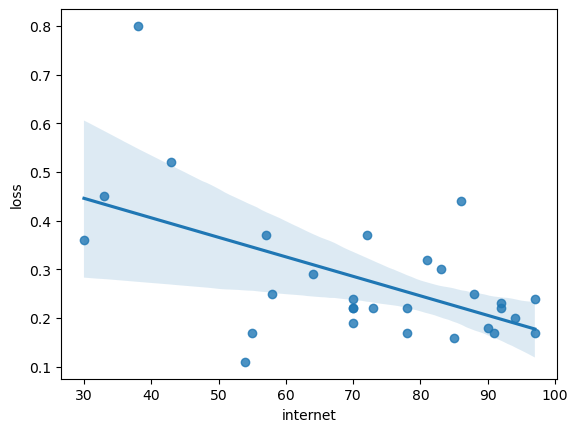

In [62]:
ax = sns.regplot(x="internet", y="loss", data=second_question_3)

In [63]:
second_question_4 = second_question_2[second_question_2['loss'] > 0.2]

In [64]:
second_question_4['internet'].corr(second_question_4['loss'])

-0.6138087890816977

This looks even better. Let us make another scatter plot.

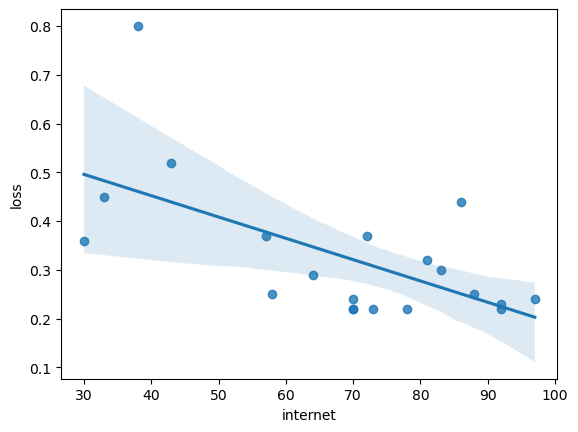

In [65]:
ax = sns.regplot(x="internet", y="loss", data=second_question_4)

- This looks good since there are not many outliers. However, the problem is that the sample size is a lot smaller and for a sample size, the larger the sample the more chances we have to get a representative sample. However, in this case, we just want to see if there is a correlation and the scatter plot above clearly shows a negative correlation.

# Correlation between private schools and learning loss

In this section we are going to see if there is any kind of correlation between private schools and learning loss. In order to find this out, we first have to see which columns are relevant to this analysis.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

After going through the info of the dataset, we found that these columns would be relevant to our analysis:
* ```private```
* ```loss```

We will select these columns in the cell below.
  

In [67]:
# Selecting the columns relevant columns for this question:
third_question = df[['private', 'loss']]

In [68]:
# Going through the first couple of rows of the Dataset:
third_question.head()

,private,loss
0,26.08010,0.44
1,29.53870,0.01
2,23.90350,0.28
3,54.17840,0.23
4,6.93809,0.29


In [69]:
# Going through the last couple of rows of the Dataset:
third_question.tail()

,private,loss
36,10.98090,0.00
37,5.49697,0.20
38,4.97713,0.37
39,20.00000,0.14
40,17.06250,0.22


In [70]:
# Calculating the correlation between the private and loss columns:
third_question['private'].corr(third_question['loss'])

0.10111894655905809

 There is no correlation between these two variables at all. We can plot these two on a scatter plot in the cell below to see how it looks like.

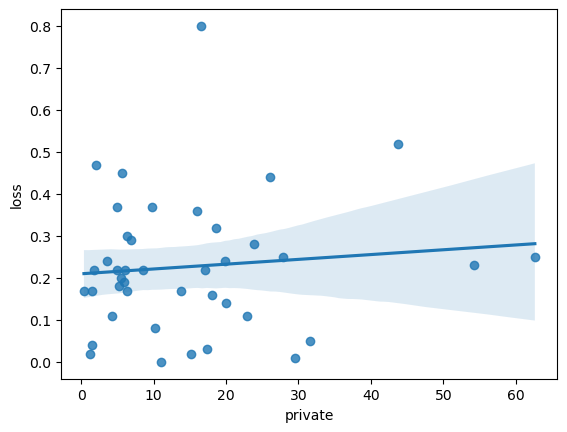

In [71]:
ax = sns.regplot(x="private", y="loss", data=third_question)

In [72]:
third_question_2 = third_question[third_question['loss'] < 0.5]

In [73]:
third_question_2 = third_question_2[third_question_2['private'] < 35]

In [74]:
third_question_2['private'].corr(third_question_2['loss'])

-0.10853100112563124

As we can see e still get a very weak correlation. Usually, the closer a correlation is to either -1 or 1 the stronger the relationship between the two variables is. However, that is clearly not the case and therefore the relationship between these two variables is just irrelevant.

# Country size and learning loss

In this section, we will examine the connection between country size and learning loss. First we want to see which columns are relevant to this analysis.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

We see that these columns can be relevant to our analysis:
* ```country```
* ```loss```
* ```population```

In [76]:
# Selecting the columns that are relevant to our analysis:
fourth_question = df[['country', 'loss', 'pop']]

In [77]:
# Checking out info of each of the columns:
fourth_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  41 non-null     object 
 1   loss     41 non-null     float64
 2   pop      41 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [78]:
# Print out the first couple of rows the DataFrame:
fourth_question.head()

,country,loss,pop
0,Argentina,0.44,45000000
1,Australia,0.01,26000000
2,Bangladesh,0.28,170000000
3,Belgium,0.23,11000000
4,Botswana,0.29,2300000


In [79]:
# Printing out the last couple of rows of the DataFrame:
fourth_question.tail()

,country,loss,pop
36,Sweden,0.00,10000000
37,Switzerland,0.20,8600000
38,Turkey,0.37,83000000
39,Uganda,0.14,44000000
40,United States,0.22,330000000


In [80]:
# Using the sort_values method to sort by the population column:
fourth_question = fourth_question.sort_values("pop")

In [81]:
# Using the min() function to see the minimum population:
fourth_question['pop'].min()

2300000

In [82]:
# Using the max() function to see the maximum population:
fourth_question['pop'].max()

1400000000

In [83]:
# Using the corr() method to see the correlation between the population and loss columns:
fourth_question['pop'].corr(fourth_question['loss'])

0.20355245550831041

Unfortunately, the correlation between these two variables is very weak. Let us make a scatter plot in the cell below and see what is going on.

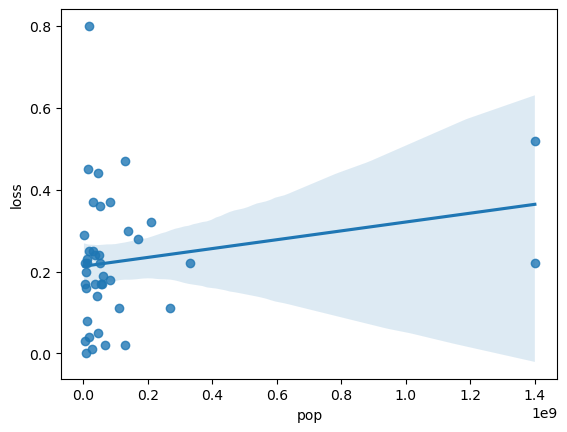

In [84]:
ax = sns.regplot(x="pop", y="loss", data=fourth_question)

Let us try to lower the value for the population column and see if that will make a difference in the correlation

In [85]:
fourth_question_2 = fourth_question[fourth_question['loss'] < 0.5]

In [86]:
fourth_question_2['pop'].corr(fourth_question_2['loss'])

0.05245311253441338

After filtering the correlation between the two columns is a lot lower. 

Since there is not strong correlation between both of the variables we could instead just analyze both of the columns separately and see why our correlatiion is not that big however that may not do much for us. Instead, it might be best for us to just move on and try another time when more data becomes avaiable. 

# The relationship between the number of deaths and learning loss

In this section we want to see if there is any connection between the number of deaths and learning loss. Let us see which columns are relevant for this section.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

After looking at the column of the dataset, we see that these coulmns are relevant:
* ```loss```
* ```deaths```

In [88]:
# Selecting columns relevant for this section:
fifth_question = df[['loss', 'deaths']]

In [89]:
# Looking at the first couple of rows of the DataFrame:
fifth_question.head()

,loss,deaths
0,0.44,288.00
1,0.01,60.37
2,0.28,17.84
3,0.23,284.67
4,0.29,118.60


In [90]:
# Looking at the last couple of rows of the DataFrame:
fifth_question.tail()

,loss,deaths
36,0.00,200.75
37,0.20,161.96
38,0.37,119.97
39,0.14,8.00
40,0.22,322.51


In [91]:
fifth_question['loss'].corr(fifth_question['deaths'])

-0.0874128230874507

Just like the previous question, there is a very weak negative correlation between the two variables.

# Number of deaths and learning loss

In this section we will see if there is any sort of connection between the number of deaths a country has and learning loss.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

After doing a little bit of digging, we see that these columns are relevant for our analysis:
* ```loss```
* ```deaths```

In [93]:
# Selecting the relevant columns for this analysis:
fifth_question = df[['loss', 'deaths']]

Next we want to see if there is any correlation between the two variables. We can use the ```corr``` method

In [94]:
# Using the corr method to compute the correlation between the loss and deaths columns:
fifth_question['loss'].corr(fifth_question['deaths'])

-0.0874128230874507

Once again, like the previous couple of questions, the correlation between the two variables is very low.

# Most common learning loss values

For this section we want to see which value is the most common for the learning loss column or we can simply say ```loss```. We can do that by building a histogram in the cell below.

<Axes: ylabel='Frequency'>

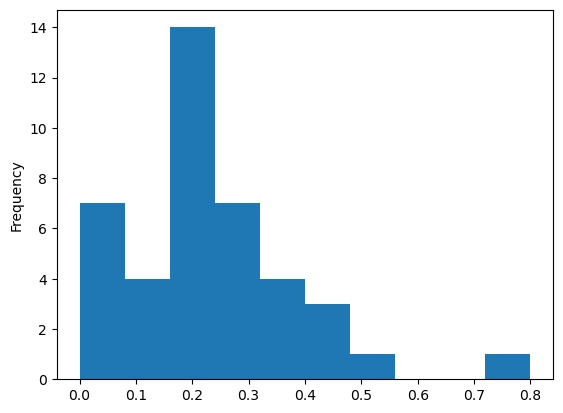

In [95]:
# Using the plot.hist method to create a histogram for the most common value for the learning loss column:
df['loss'].plot.hist()

We can see from here that the most common learning loss value is around 0.2. However, not many had a high learning loss value over 0.7. It is also worth noting that this histogram is right skewed since the tail points to the right or to the direction of positive numbers. However, to make it easier, let us calculate the percentages for each learning loss group in the next cell and do more analysis for this column.

In [96]:
# Printing the smallest value for the loss column:
df['loss'].min()

0.0

In [97]:
# Printing the biggest value for the loss column:
df['loss'].max()

0.8

In [98]:
# Creating a grouped frequency table for the loss column:
df['loss'].value_counts(bins=10).sort_index()

(-0.0018, 0.08]     8
(0.08, 0.16]        4
(0.16, 0.24]       15
(0.24, 0.32]        6
(0.32, 0.4]         3
(0.4, 0.48]         3
(0.48, 0.56]        1
(0.56, 0.64]        0
(0.64, 0.72]        0
(0.72, 0.8]         1
Name: count, dtype: int64

We can see from this grouped frequency table, that a good chunk or a least half of these countries have a learning loss value between 0.16 and 0.32. Let us turn these into percentage values in the cell below.

In [99]:
# Creating a grouped frequency for the loss column but this time with percentages instead:
df['loss'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

(-0.0018, 0.08]    19.512195
(0.08, 0.16]        9.756098
(0.16, 0.24]       36.585366
(0.24, 0.32]       14.634146
(0.32, 0.4]         7.317073
(0.4, 0.48]         7.317073
(0.48, 0.56]        2.439024
(0.56, 0.64]        0.000000
(0.64, 0.72]        0.000000
(0.72, 0.8]         2.439024
Name: proportion, dtype: float64

Just like with the previous calculation almost half of the countries in the dataframe have a learning loss value between 0.16 and 0.32 which include approximately 36% of the values have a learning loss value between 0.16 and 0.24 and approximately 14% of the values having a learning loss value between 0.24 and 0.32.

We can make a box and whisker plot to better visualize the average, minimum, maximum, and other important values. We can do that in the cell below.

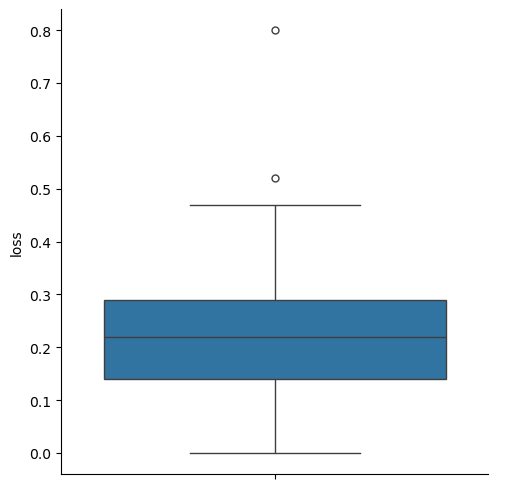

In [100]:
# Using catplot to plot a box plot for the loss variable:
sns.catplot(y='loss', kind='box', data=df)

If we are not counting outliers, we can see that the maximum is close to 0.5. However, when using the ```max``` method the maximum was 0.8. The minimum however on the box plot seems like it is zero. We can also see that the interquartile range or middle quartile is a little bit above 0.2. Let us see if we can rid of the outliers.

In [101]:
# Filtering the loss column:
loss = df[df['loss'] <= 0.5]

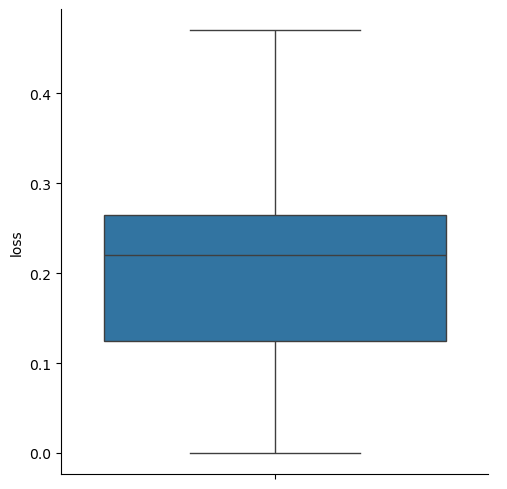

In [102]:
# Using catplot to plot a box plot for the loss variable:
sns.catplot(y='loss', kind='box', data=loss)

 Now we can see that the maximum is lose to 0.5. Also it is important to note that there are no outliers in the second box plot after filtering the loss column. Now that we have that settled, we can see which country has the higest and lowest learning loss in the cell below. However, to make things easier we can use the ```describe``` method that will print out the average, minimum, max, and other values from the box and whisker plot above.

In [103]:
# Using the describe method for the loss column:
loss['loss'].describe()

count    39.000000
mean      0.204615
std       0.123902
min       0.000000
25%       0.125000
50%       0.220000
75%       0.265000
max       0.470000
Name: loss, dtype: float64

Let us compare this with the dataset that had some outliers.

In [104]:
df['loss'].describe()

count    41.000000
mean      0.226829
std       0.159459
min       0.000000
25%       0.140000
50%       0.220000
75%       0.290000
max       0.800000
Name: loss, dtype: float64

There are some differences between the two however the gap between most of the values are not that big. To better visualize which countries had the biggest and smallest loss values we can create a bar plot.

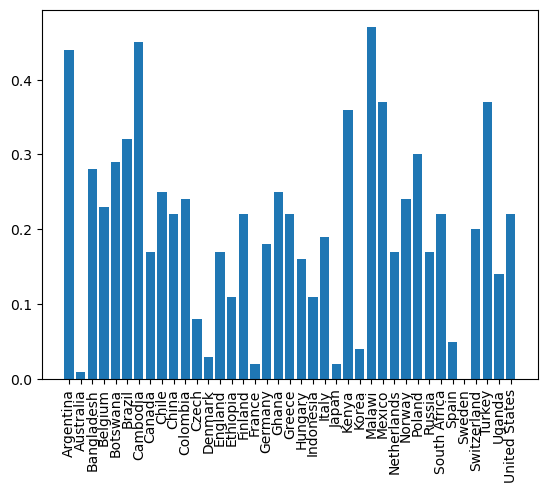

In [105]:
# Creating a bar plot of the countries and their learning loss value:
import matplotlib.pyplot as plt
plt.bar(x = "country",height= "loss", data = loss)
plt.xticks(loss['country'], rotation = 90)
plt.show()

Based on the bar graph above we can see that Malawi has the highest learning loss value. We can see that Australia has the lowest learning loss value.

# High and Low income countries

In this section we will look at high income and low income countries and see how they are with learning loss and other instances. To go about this, it is a good idea to first have one dataset that only includes countries that are high income and another dataset that includes countries that are low income. We can do that in the following cells below.

In [106]:
# Including only rows where the income is high:
high_income = df[df['high'] == True]

In [107]:
high_income['high'].unique()

<BooleanArray>
[True]
Length: 1, dtype: boolean

In [108]:
# Including only rows where the income is low:
low_income = df[df['high'] == False]

In [109]:
low_income['high'].unique()

<BooleanArray>
[False]
Length: 1, dtype: boolean

Now that we got both of our separate datasets. Let us first compare the averages of the learning loss with high income and low income countries.

In [110]:
# Calculating the average learning loss in high income countries:
high_income['loss'].mean()

0.13764705882352943

In [111]:
# Calculating the average learning loss in low income countries:
low_income['loss'].mean()

0.29

We can see that the average learning loss in low income countries is more than double the learning loss in high income countries with low income countries at .29 and high income countries at approximately 0.13. We can plot these two in a bar plot.

In [112]:
# Creating a small small dictionary:
high_low_income = {"high": [True, False],
                   "average learning loss": [high_income['loss'].mean(), low_income['loss'].mean()]
                  }

In [113]:
# Transforming the small dictionary to a DataFrame:
frame = pd.DataFrame(high_low_income)

In [114]:
frame

,high,average learning loss
0,True,0.137647
1,False,0.290000


<Axes: xlabel='high', ylabel='average learning loss'>

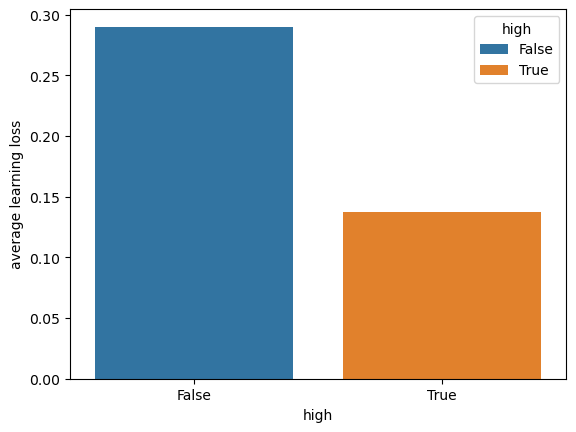

In [115]:
# Creating a bar plot of the income countries and their average learning loss value:
import matplotlib.pyplot as plt
sns.barplot(x = 'high', y = 'average learning loss', hue = 'high', data = frame)

As we can see from the bar plot above, low income countries have higher learning loss value than high income countries on average. Let us do some correlations. First, let us see with both the high and low income countries if there is a strong or weak correlation between learning loss and the weeks school was closed.

In [116]:
# Using the corr() method to see the correlation between the learning loss and weeks columns for high income country:
high_income['loss'].corr(high_income['weeks'])

0.2652665138933455

In [117]:
# Using the corr() method to see the correlation between the learning loss and weeks columns for low income country:
low_income['loss'].corr(low_income['weeks'])

0.5675932497395489

We can see that for low income countries, the correlation between the learning loss and weeks columns is stronger than that for the high income countries. Let us plot a scatter plot for the low income and high income datasets in the cells below.

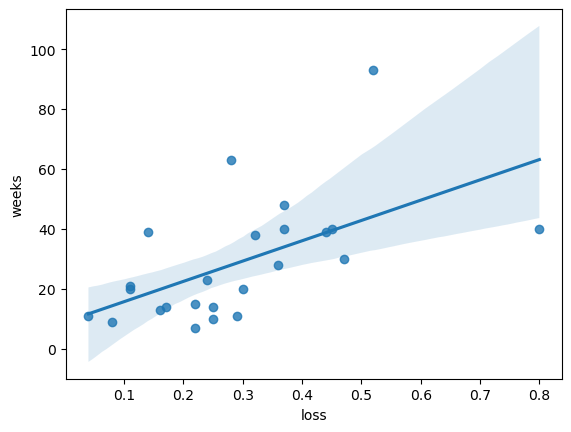

In [118]:
ax = sns.regplot(x="loss", y="weeks", data=low_income)

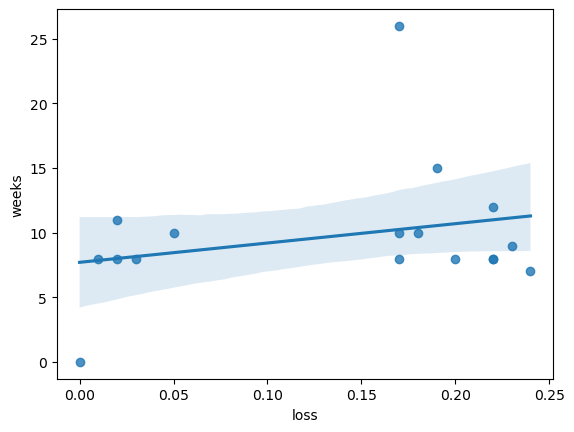

In [119]:
ax = sns.regplot(x="loss", y="weeks", data=high_income)

There are some outliers for the low income. Let us see if we can get rid of them and see if that will improve the positive correlation. However, for the high income we can see that the values are not necessarily increasing. They are just increasing for a little bit and then decreasing and then increasing.

In [120]:
low_income_2 = low_income[low_income['loss'] < 0.6]

In [121]:
low_income_2['loss'].corr(low_income_2['weeks'])

0.6453028093991778

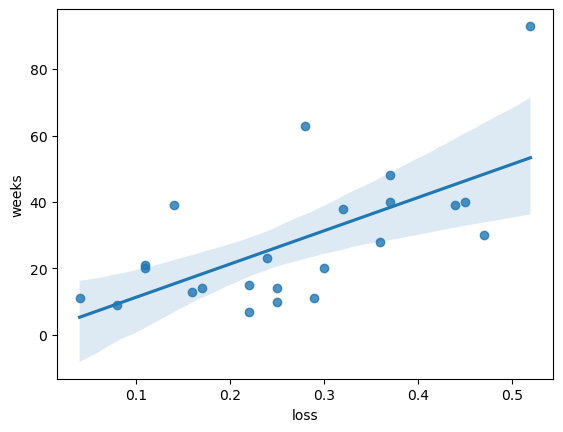

In [122]:
ax = sns.regplot(x="loss", y="weeks", data=low_income_2)

As we can see, the correlation between the weeks and learning loss variables for the low income countries is a lot higher than the correlation between the weeks and loss variables for the high income countries. Let us see how the learning loss variable for both the high and low income countries compares with other variables. Let us try the ```internet``` variable next.

In [123]:
# Using the corr() method to see the correlation between the learning loss and internet columns for high income country:
high_income['loss'].corr(high_income['internet'])

-0.24374884885847656

In [124]:
# Using the corr() method to see the correlation between the learning loss and internet columns for low income country:
low_income['loss'].corr(low_income['internet'])

-0.21354827177349456

Unfortunately, the negative correlation between the ```loss``` and ```internet``` variables for the low income and high income countries is very weak. Let us plot scatter plots for these in the cells below.

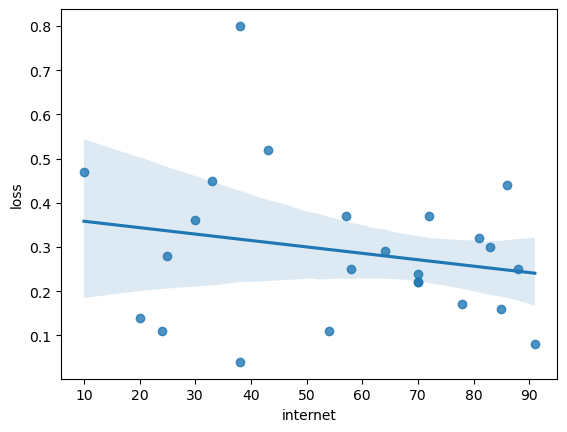

In [125]:
ax = sns.regplot(x= "internet", y="loss", data=low_income)

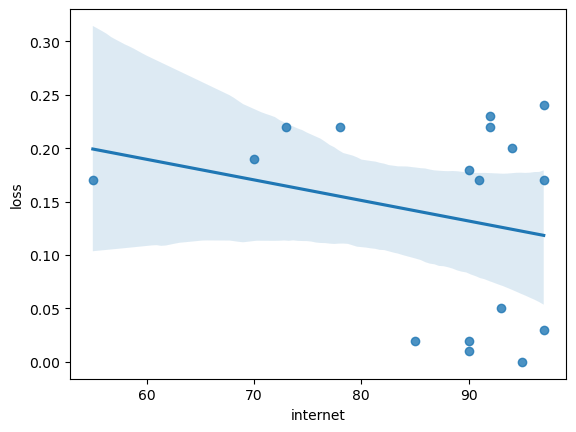

In [126]:
ax = sns.regplot(x="internet", y="loss", data=high_income)

Looking at the scatter plots above, we cannot see any correlation between these two variables for the low and high income countries. There are too many outliers for both of them.

In [127]:
# Creating a grouped frequency for the loss column for the low income countries with percentages:
a = low_income['loss'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

In [128]:
# Creating a grouped frequency for the loss column for the high income countries with percentages:
b = high_income['loss'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

As we can see the high income countries have way lower learning loss variables than that of low income countries. However, we cannot necessarily jump to that conclusion because there were not many observations. If more data is available, then maybe one day we can conclude that high income countries are better than low income countries due to low learning loss values.

In [129]:
df.head()

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,...,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
0,Argentina,0.44,39,288.00,8585.69,26.08010,86,457.418,65.0681,67.0396,...,1521,45000000,9.51,ARG,Latin America and the Caribbean,18.2967,False,413.418,False,16.5367
1,Australia,0.01,8,60.37,51680.30,29.53870,90,544.360,64.0000,61.0000,...,64,26000000,11.54,AUS,Advanced Economies,21.7744,True,543.360,True,21.7344
2,Bangladesh,0.28,63,17.84,2270.35,23.90350,25,340.088,17.0000,70.0000,...,3969,170000000,5.91,BGD,South Asia,13.6035,False,312.088,False,12.4835
3,Belgium,0.23,9,284.67,45189.40,54.17840,92,340.088,87.0000,50.0000,...,81,11000000,10.69,BEL,Advanced Economies,13.6035,True,317.088,True,12.6835
4,Botswana,0.29,11,118.60,6348.83,6.93809,64,417.656,12.0000,50.0000,...,121,2300000,9.55,BWA,Sub-Saharan Africa,16.7062,False,388.656,False,15.5462


In [130]:
a

(0.0382, 0.116]    16.666667
(0.116, 0.192]     12.500000
(0.192, 0.268]     20.833333
(0.268, 0.344]     16.666667
(0.344, 0.42]      12.500000
(0.42, 0.496]      12.500000
(0.496, 0.572]      4.166667
(0.572, 0.648]      0.000000
(0.648, 0.724]      0.000000
(0.724, 0.8]        4.166667
Name: proportion, dtype: float64

<Axes: >

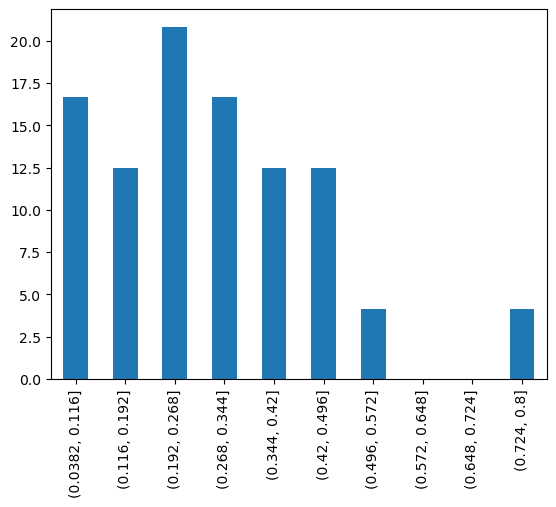

In [131]:
# Bar plot for the frequency of the different learning loss values for low income countries:
a.plot.bar()

<Axes: >

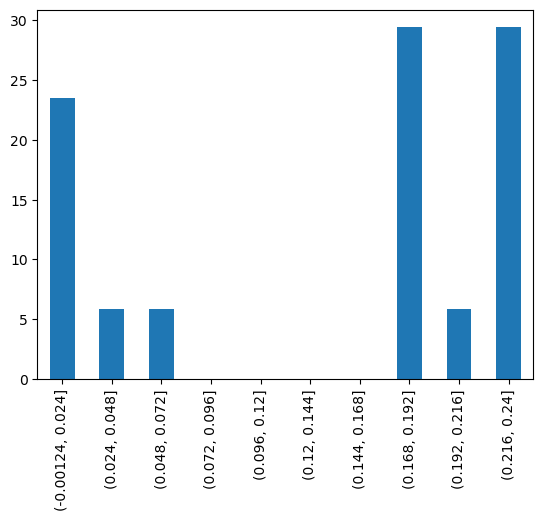

In [132]:
# Bar plot for the frequency of the different learning loss values for high income countries:
b.plot.bar()

Let us compare the high and low income countries with the ```weeks``` variable in the next couple of cells

In [133]:
# Creating a grouped frequency for the weeks column for the low income countries with percentages:
c = low_income['weeks'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

In [134]:
# Creating a grouped frequency for the weeks column for the high income countries with percentages:
d = high_income['weeks'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

In [135]:
c

(6.912999999999999, 15.6]    37.500000
(15.6, 24.2]                 16.666667
(24.2, 32.8]                  8.333333
(32.8, 41.4]                 25.000000
(41.4, 50.0]                  4.166667
(50.0, 58.6]                  0.000000
(58.6, 67.2]                  4.166667
(67.2, 75.8]                  0.000000
(75.8, 84.4]                  0.000000
(84.4, 93.0]                  4.166667
Name: proportion, dtype: float64

In [136]:
d

(-0.027, 2.6]     5.882353
(2.6, 5.2]        0.000000
(5.2, 7.8]        5.882353
(7.8, 10.4]      64.705882
(10.4, 13.0]     11.764706
(13.0, 15.6]      5.882353
(15.6, 18.2]      0.000000
(18.2, 20.8]      0.000000
(20.8, 23.4]      0.000000
(23.4, 26.0]      5.882353
Name: proportion, dtype: float64

As we can see from the data we are given, it seems that high income countries did not close schools for long whereas with low income countries schools were closed for longer. Let us plot bar plotsof the ```weeks``` closed variable for the low and high income countries.

<Axes: >

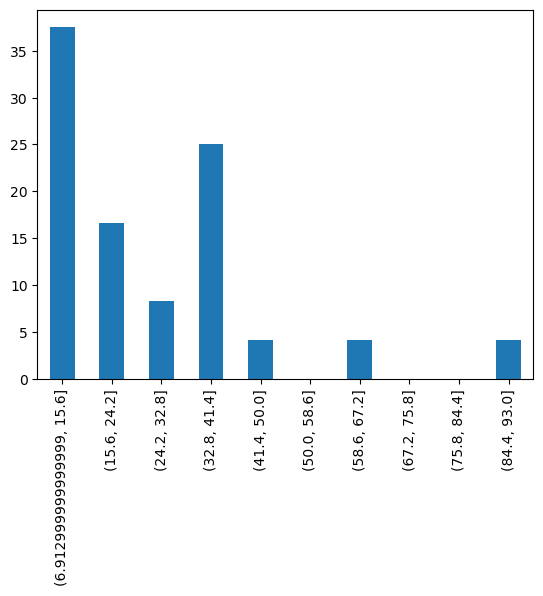

In [137]:
# Bar plot for the frequency of the different weeks values for low income countries:
c.plot.bar()

<Axes: >

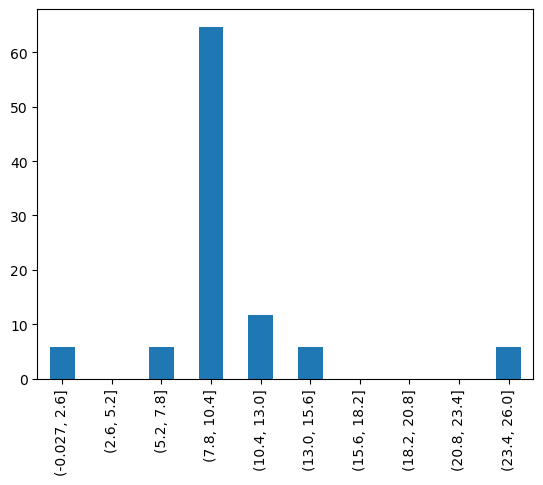

In [138]:
# Bar plot for the frequency of the different weeks values for high income countries:
d.plot.bar()

Let us see what internet values are the most common in both the low income and high income countries.

In [139]:
# Creating a grouped frequency for the internet column for the low income countries with percentages:
e = low_income['internet'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

In [140]:
# Creating a grouped frequency for the internet column for the high income countries with percentages:
f = high_income['internet'].value_counts(normalize = True, bins = 10).sort_index(ascending = True) * 100

<Axes: >

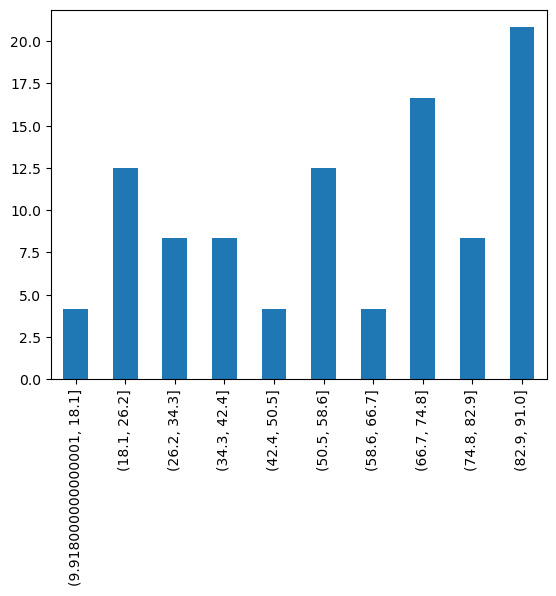

In [141]:
# Bar plot for the frequency of the different internet values for low income countries:
e.plot.bar()

<Axes: >

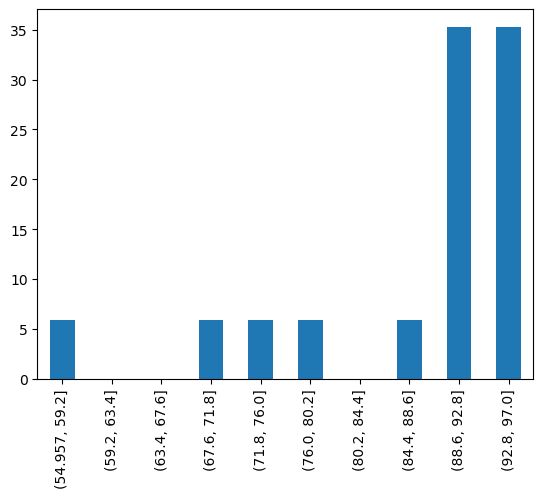

In [142]:
# Bar plot for the frequency of the different internet values for high income countries:
f.plot.bar()

As we can see from the two bar plots, high income countries based off the data we are given fair much better with internet usage than low income countries. However, this can change if we got more data available that proves the opposite.

## Instances where schools closures did not affect learning loss

In this section we want to see if there were any instances where school closures did not affect the learning loss values. We could do that by sorting the dataset by the ```loss``` variable in ascending order.

In [143]:
# Selecting the country, loss, and weeks columns:
question_eight = df[['country', 'loss', 'weeks']]

In [144]:
# Sorting by the loss column by using the sort_values method:
question_eight.sort_values("loss")

,country,loss,weeks
36,Sweden,0.00,0
1,Australia,0.01,8
16,France,0.02,8
24,Japan,0.02,11
12,Denmark,0.03,8
26,Korea,0.04,11
35,Spain,0.05,10
11,Czech,0.08,9
14,Ethiopia,0.11,21
22,Indonesia,0.11,20


We can see countries like Sweden, Australia, and France and a couple of others have very low learning loss values.

In conclusion, we learned a lot of important information. We can see that there were various factors that led to learning loss such as how long schools were closed on average and internet use. We saw that there were vast differences when it came to learning loss in both low income and high income countries.  However, there were many other variables that had no correlation with learning loss. On top of that, the population was very small so it may not have been wise to jump to any conclusions. However, if more data were available then we may be able to come to better conclusions. 